In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import seaborn as sns
import cmocean.cm as cmo
# plot styles/formatting
import seaborn as sns
import matplotlib.ticker as mticker
from IPython.display import Image, display

# Path to modules
sys.path.append('../modules')

# Import my modules
from plotter import draw_basemap, add_subregion_boxes, make_cmap
from markovchain import MarkovChain, transition_matrix

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [3]:
ceofid = 'HUV500'
neofs = 2 # choose number of eofs
nk = 3 # choose number of clusters
ssn = 'djfmam'

In [4]:
def create_P_matrix(ceofid, neofs, nk, ssn, step):
    # open data
    out_path = path_to_out + ceofid + '/' + ssn + '/' + 'neof' + str(neofs) + '/k' + str(nk) + '/'
    filepath = out_path + 'AR-types_ALLDAYS.csv'
    df = pd.read_csv(filepath)

    # run with AR_CAT data
    t = df.AR_CAT.values.tolist()
    m = transition_matrix(t, step)
    for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

    P = np.array(m)*100 # Transition matrix as array, convert to %
    
    return P

In [5]:
P = []
for day in range(1,8):
    print(day)
    tmp = create_P_matrix(ceofid, neofs, nk, ssn, day)
    P.append(tmp)

1
0.93 0.02 0.02 0.03
0.63 0.33 0.01 0.02
0.59 0.09 0.30 0.02
0.51 0.02 0.07 0.40
2
0.91 0.02 0.03 0.04
0.81 0.11 0.03 0.05
0.82 0.07 0.10 0.01
0.73 0.03 0.07 0.17
3
0.90 0.03 0.03 0.04
0.85 0.05 0.06 0.03
0.85 0.05 0.08 0.02
0.84 0.03 0.04 0.08
4
0.90 0.03 0.03 0.04
0.87 0.04 0.04 0.04
0.84 0.07 0.06 0.03
0.85 0.05 0.05 0.05
5
0.90 0.03 0.03 0.04
0.91 0.04 0.03 0.02
0.87 0.05 0.05 0.03
0.86 0.05 0.04 0.05
6
0.90 0.03 0.04 0.04
0.90 0.04 0.04 0.02
0.89 0.03 0.05 0.04
0.89 0.04 0.02 0.04
7
0.90 0.03 0.04 0.04
0.90 0.04 0.03 0.02
0.89 0.04 0.04 0.03
0.89 0.03 0.03 0.05


/home/nash/DATA/repositories/AR_types/figs/figS5_transition_heatmap.png


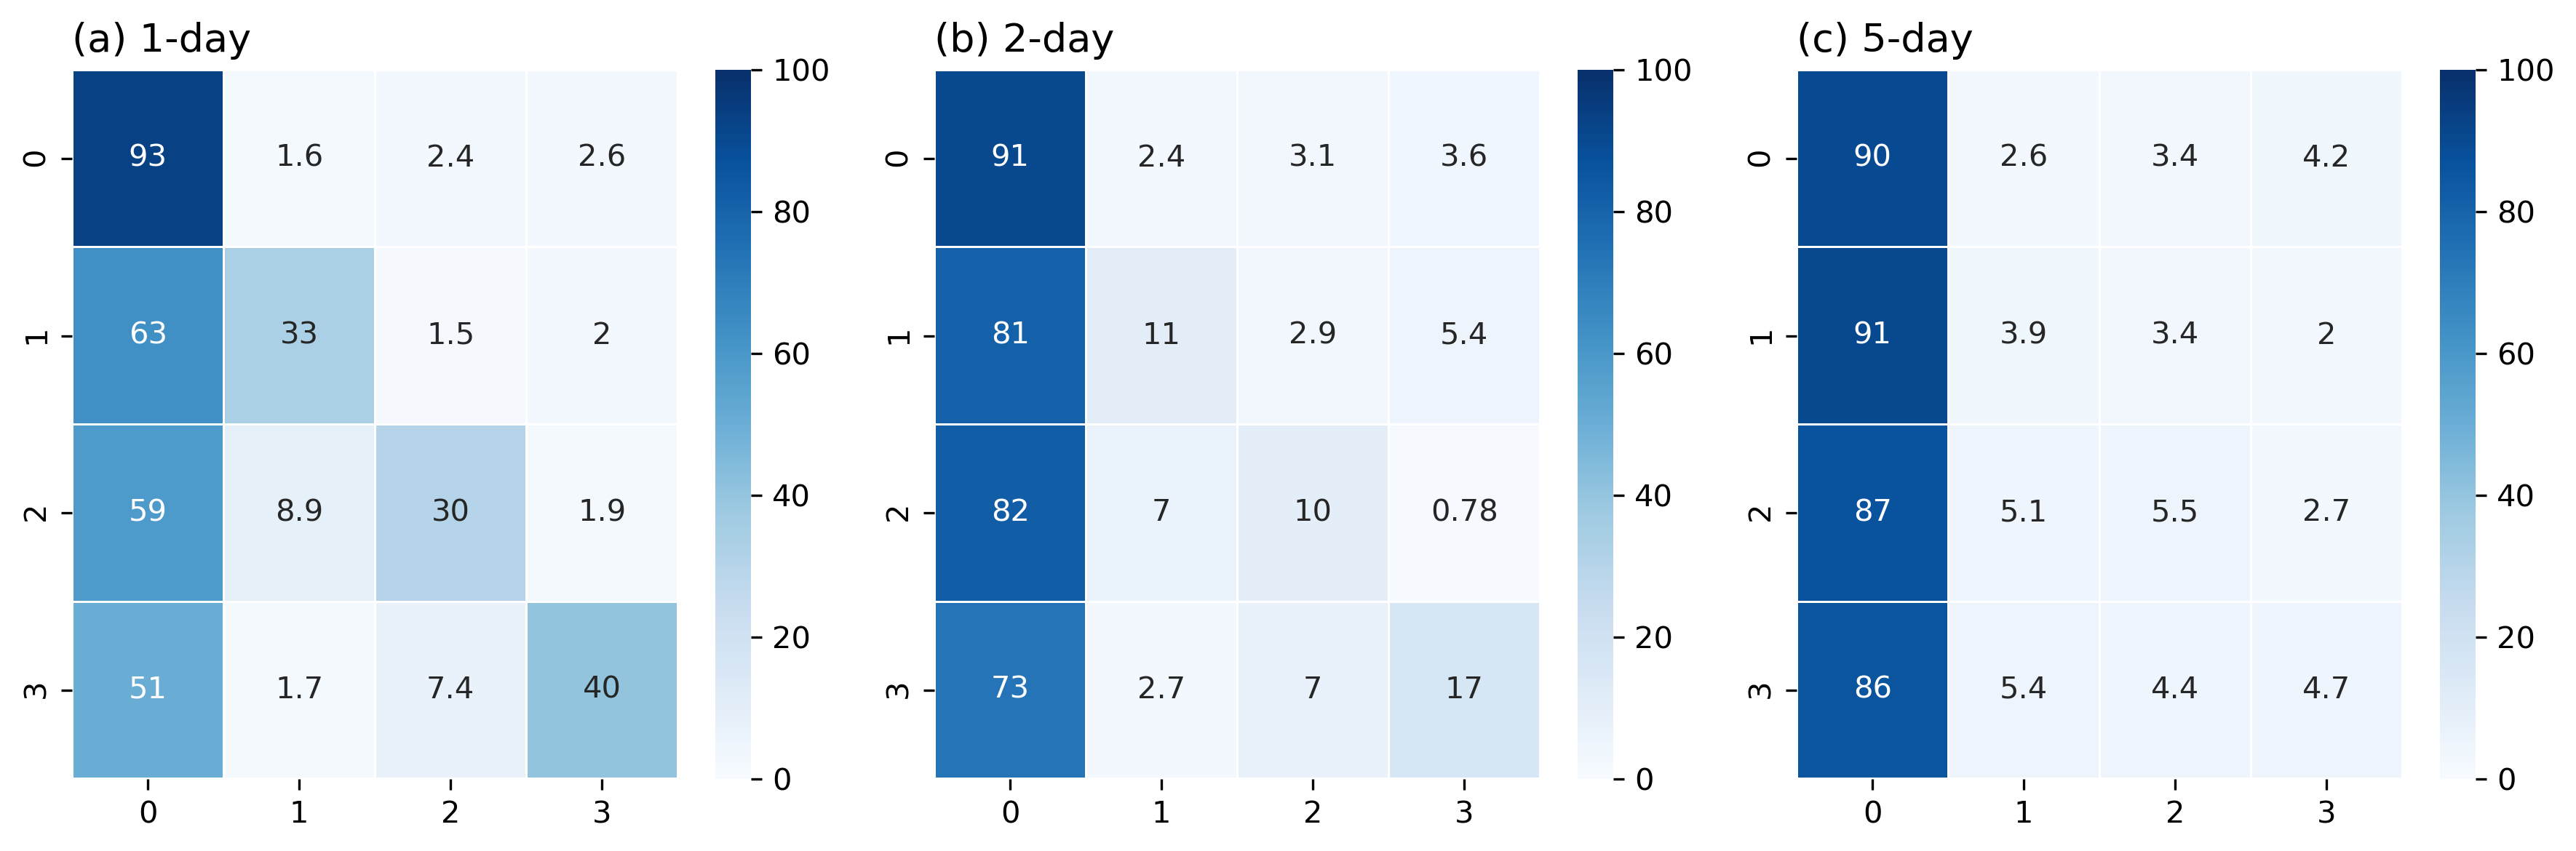

In [6]:
fname = path_to_figs + 'figS5_transition_heatmap'
fmt = 'png'

plt_labels = ['(a) 1-day', '(b) 2-day', '(c) 5-day']
fig = plt.figure()
fig.set_size_inches((12.,4.))
fig.dpi = 300
nrows = 1
ncols = 3
nplots = nrows*ncols

cmap = "YlGnBu"
cmap = "Blues"
for i, step in enumerate([1, 2, 5]):
    ax = plt.subplot(nrows, ncols, i+1)
    Pround = np.round(P[step-1], 2) # Round decimals to two places
    g = sns.heatmap(Pround, vmin=0, vmax=100, annot=True, linewidths=.5, cmap=cmap)
    plt.title(plt_labels[i], fontsize=13, loc='left')

plt.tight_layout()
# plt.show()

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=300)

plotFile = fname + '.png'
print(plotFile)

/home/nash/DATA/repositories/AR_types/figs/fig5_transition_matrix.png


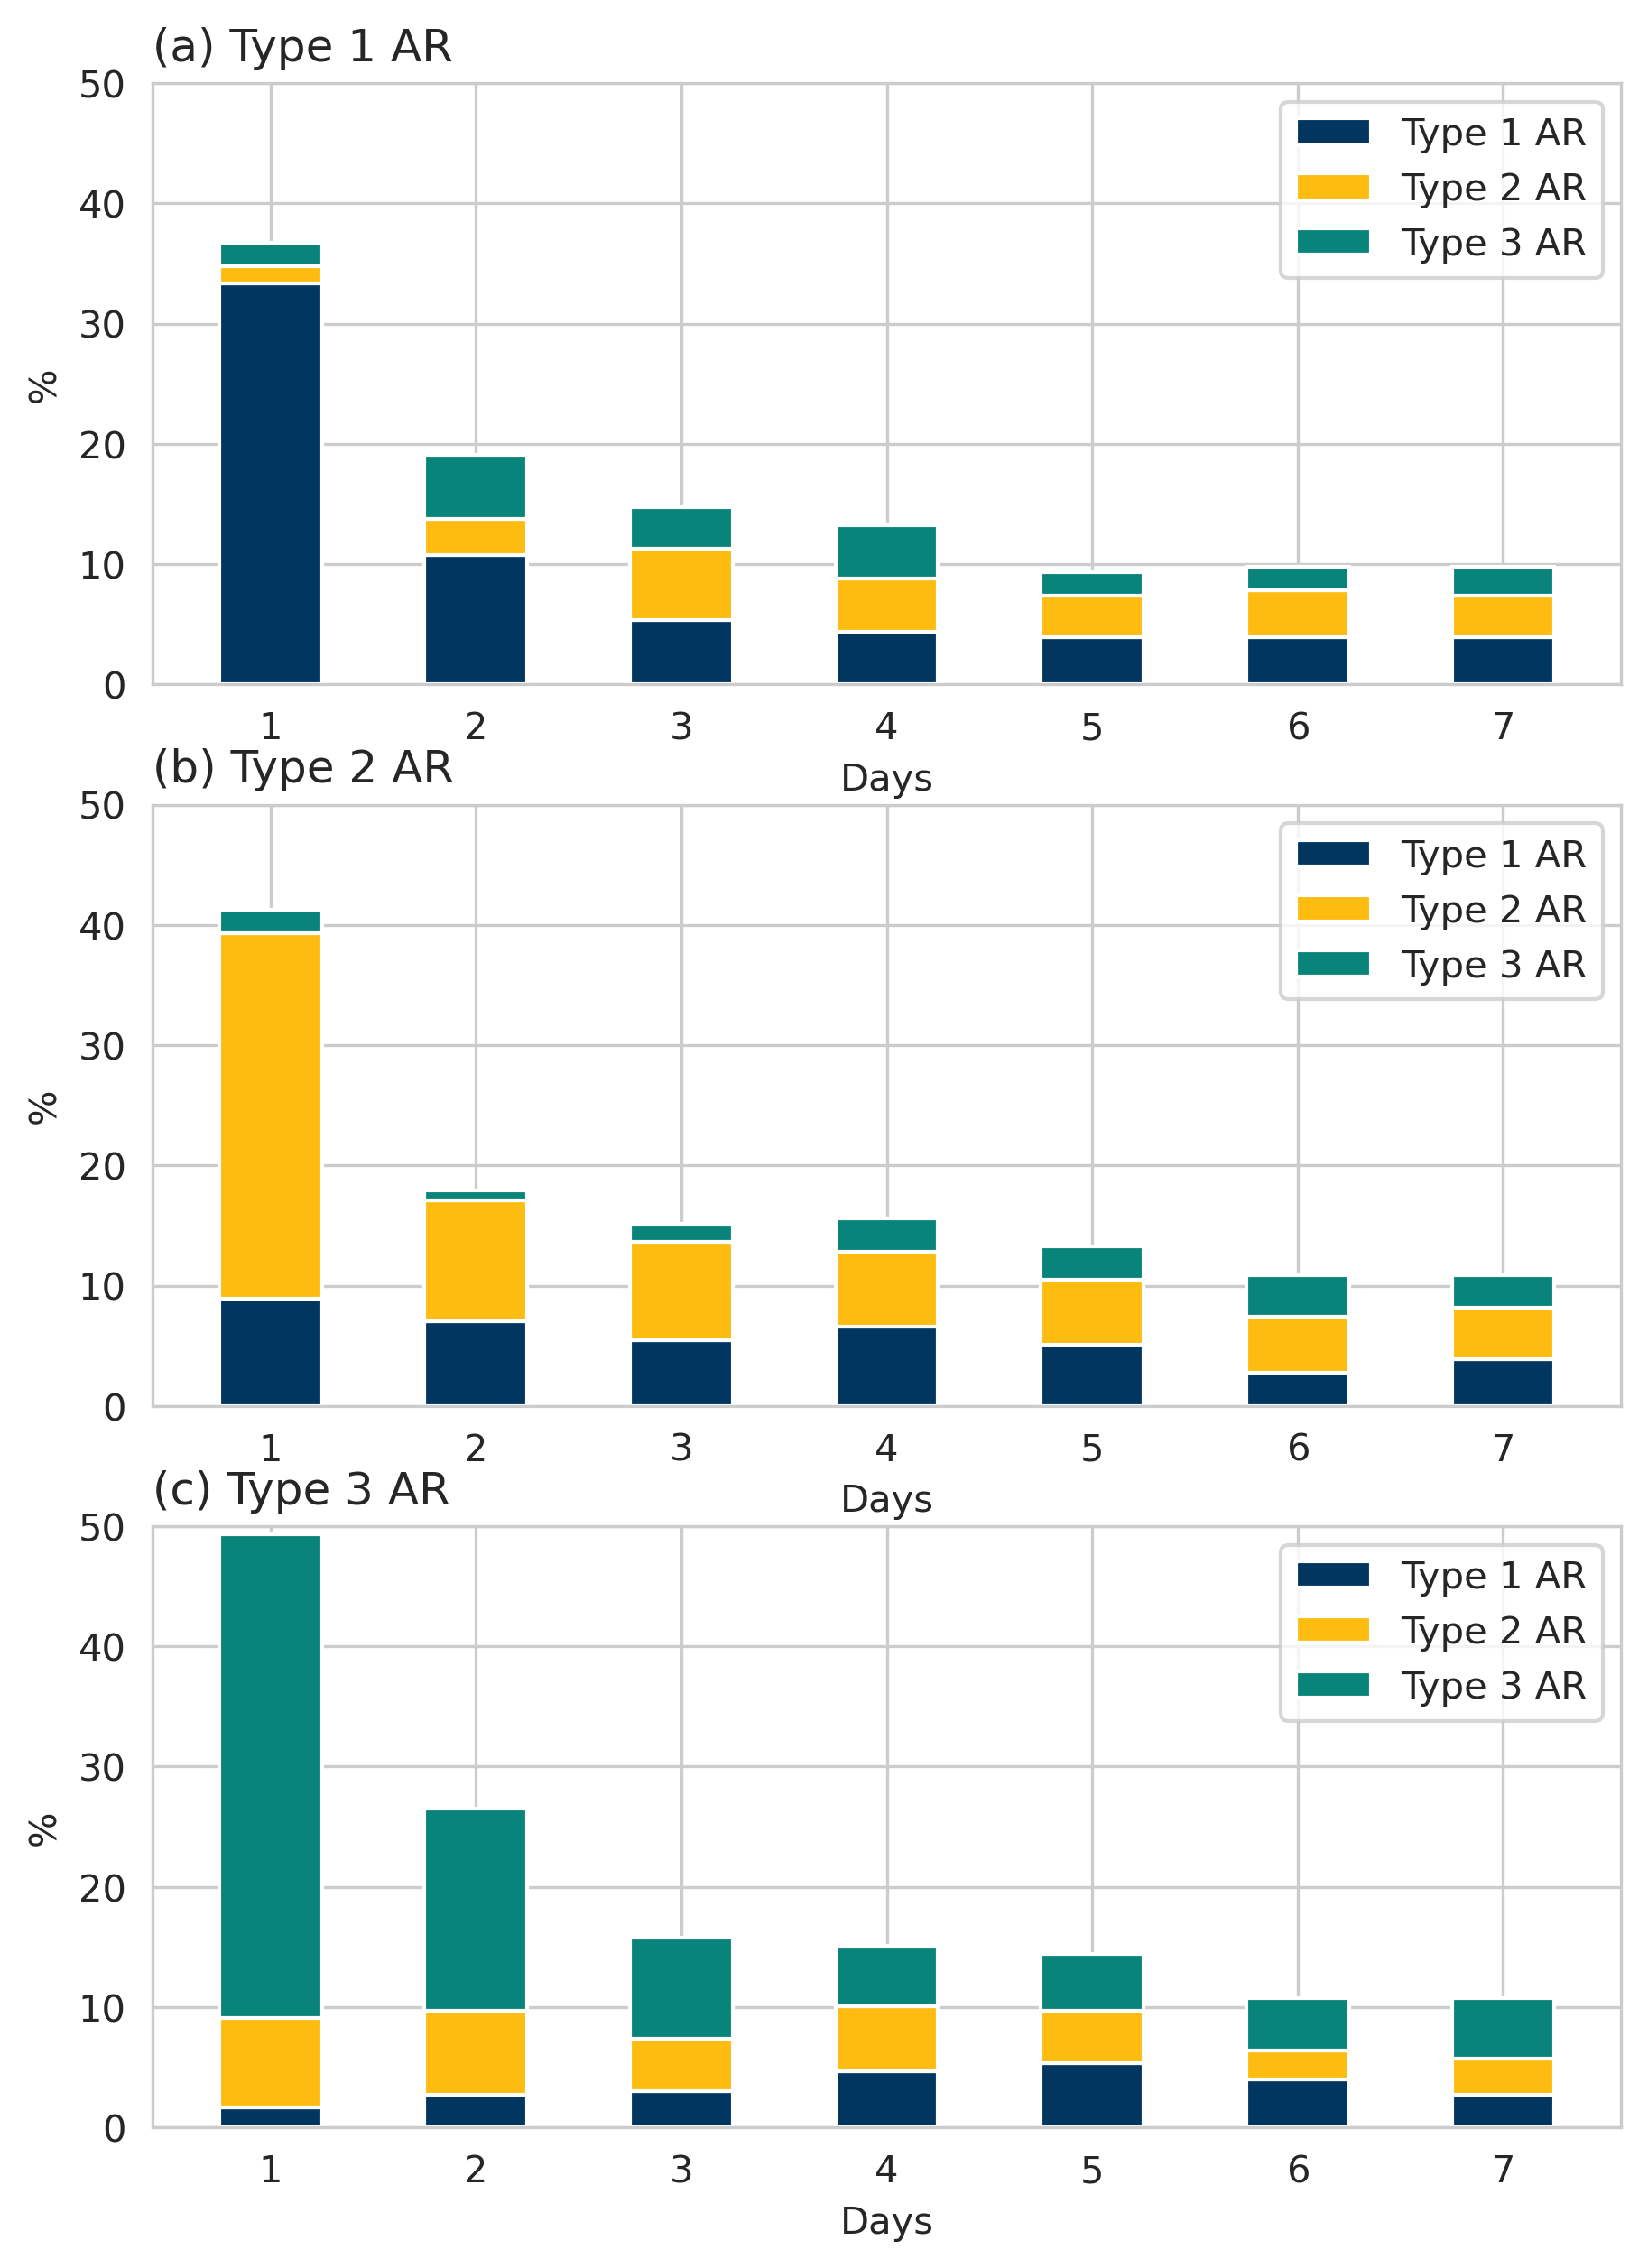

<Figure size 2100x3000 with 0 Axes>

In [12]:
fname = path_to_figs + 'fig5_transition_matrix'
fmt = 'png'

fig = plt.figure()
fig.set_size_inches((7.,10.))
fig.dpi = 300
nrows = 3
ncols = 1
nplots = nrows*ncols
ndays = 7
plt_lbl = ['(a) Type 1 AR', '(b) Type 2 AR', '(c) Type 3 AR']
sns.set_style("whitegrid")

for k in range(nrows):
    ax = plt.subplot(nrows, ncols, k+1)

    # transition from state 1 to state 0
    greyBars = [P[i][k+1, 0] for i in range(ndays)]
    # transition from state 1 to state 1
    greenBars = [P[i][k+1, 1] for i in range(ndays)]
    # transition from state 1 to state 2
    orangeBars = [P[i][k+1, 2] for i in range(ndays)]
    # transition from state 1 to state 3
    blueBars = [P[i][k+1, 3] for i in range(ndays)]

    # plot
    barWidth = 0.5
    r = range(ndays)
    names = ('1','2','3','4','5', '6', '7')
    # ["#003660", "#FEBC11", "#09847A"] # navy, gold, sea green
    # Create green Bars
    ax.bar(r, greenBars, color="#003660", edgecolor='white', width=barWidth, label='Type 1 AR')
    # Create orange Bars
    ax.bar(r, orangeBars, bottom=greenBars, color="#FEBC11", edgecolor='white', width=barWidth, label='Type 2 AR')
    # Create blue Bars
    ax.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color="#09847A", edgecolor='white', width=barWidth, label='Type 3 AR')
#     # Create grey Bars
#     ax.bar(r, greyBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#D3D3D3', edgecolor='white', width=barWidth, alpha=0.2)

    ax.set_xlabel("Days")
    ax.set_ylabel("%")
    ax.set_ylim(0, 50)
    # Custom x axis
    plt.xticks(r, names)
    ax.set_title(plt_lbl[k], loc='left')
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)

 

    ## Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=fig.dpi)
fig.clf()

plotFile = fname + '.png'
print(plotFile)
display(Image(plotFile))

In [ ]:
# ssn='djf'
# mc = MarkovChain(P1, ['None', '1', '2', '3'])
# # save plot
# filepath = path_to_figs + ssn + '_markov'+ '.png'
# mc.draw(img_path=filepath)